In [1]:
from hydroDL import kPath

import rasterio
from rasterio.plot import show
import geopandas as gpd
from shapely.geometry import Point
from matplotlib import pyplot as plt

import numpy as np
import os

loading package hydroDL


In [2]:
# import random tif
rnn_map_dir = os.path.join(kPath.dirVeg, 'predictions/full_maps')
tif_name = os.listdir(rnn_map_dir)[0]

tif_path = os.path.join(rnn_map_dir, tif_name)
tif_path

'/Users/andyhuynh/Documents/lfmc/data/predictions/full_maps/lfmc_map_2019-09-01.tif'

In [3]:
import random

def generate_random_us_coordinate():
    # Define the latitude and longitude boundaries for the USA
    lat_min, lat_max = 24.396308, 49.384358
    lon_min, lon_max = -125.0, -66.93457
    
    # Generate random latitude and longitude within these boundaries
    latitude = random.uniform(lat_min, lat_max)
    longitude = random.uniform(lon_min, lon_max)
    
    return (longitude, latitude)

# Generate a random coordinate within the USA
coordinate = generate_random_us_coordinate()

In [5]:
coordinate = (-112.239, 36.708)

In [6]:
with rasterio.open(tif_path) as src:
    row, col = src.index(coordinate[0], coordinate[1])
    lfmc_value = src.read(1)[row, col]

print(f"LFMC value at {coordinate}: {lfmc_value}")

LFMC value at (-112.239, 36.708): 90


In [38]:
import rasterio
dat = rasterio.open(tif_path)
# read all the data from the first band
z = dat.read()[0]

# check the crs of the data
dat.crs
# >>> CRS.from_epsg(4326)

# check the bounding-box of the data
dat.bounds
# >>> Out[49]: BoundingBox(left=-120.0, bottom=45.0, right=-117.0, top=48.0)

# since the raster is in regular lon/lat grid (4326) we can use 
# `dat.index()` to identify the index of a given lon/lat pair
# (e.g. it expects coordinates in the native crs of the data)

def getval(lon, lat):
    idx = dat.index(lon, lat, precision=1E-6)    
    return dat.xy(*idx), z[idx]

getval(coordinate[0], coordinate[1])
# >>> ((-117.99995833333334, 46.00004166666667), 10)

IndexError: index 20649 is out of bounds for axis 1 with size 13907

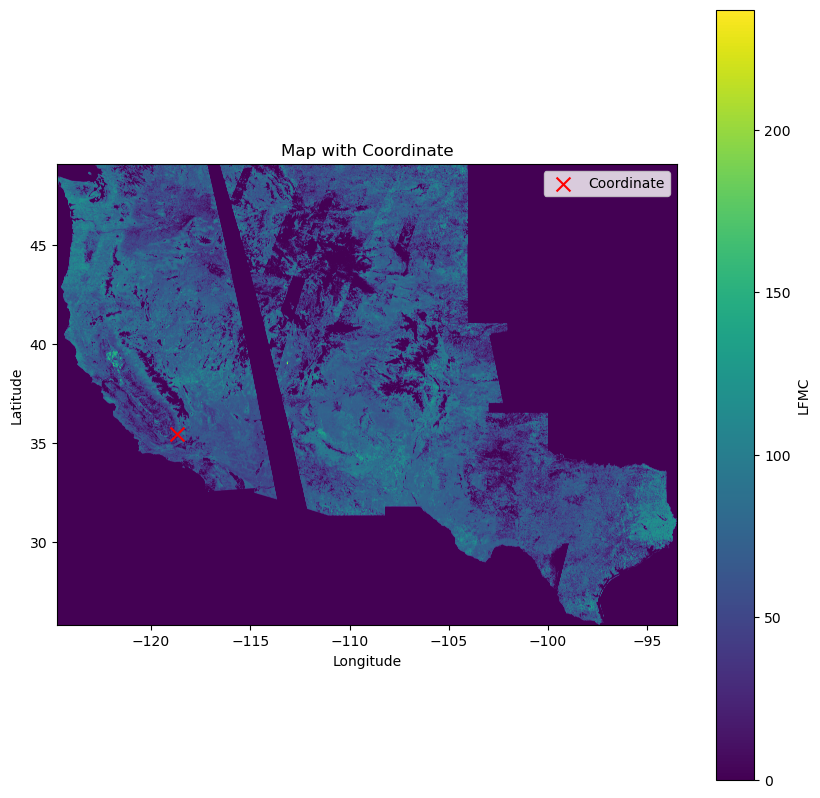

In [12]:
# Open the TIFF file
with rasterio.open(tif_path) as src:
    # Read the first band of the raster
    raster_data = src.read(1)
    transform = src.transform

# Plot the TIFF map
plt.figure(figsize=(10, 10))
plt.imshow(raster_data, cmap='viridis', extent=(src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top))
plt.colorbar(label='LFMC')

# Create a GeoDataFrame with the coordinate
gdf = gpd.GeoDataFrame([{'geometry': Point(coordinate[0], coordinate[1])}], crs="EPSG:4326")

# Reproject the GeoDataFrame to the raster's CRS
gdf = gdf.to_crs(src.crs)

# Extract the reprojected coordinate
x, y = gdf.geometry.x[0], gdf.geometry.y[0]

# Plot the coordinate on the map
plt.scatter(x, y, color='red', marker='x', s=100, label='Coordinate')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map with Coordinate')
plt.show()